In [1]:
import os
from python_libs.optical_flow import RaftModel
from python_libs.video import get_frames


/home/equipo/Insync/arnoldjair@gmail.com/GoogleDrive/Desarrollo/python_libs/.venv/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


No module named 'alt_cuda_corr'


In [2]:
model_path = os.path.join("/home/equipo/Insync/arnoldjair@gmail.com/GoogleDrive/Desarrollo/python_libs/models/raft-sintel.pth")
model = RaftModel(model_path)

In [3]:
frame_time = 300
width = 416
height = 416
video_path = "/home/equipo/Insync/arnoldjair@gmail.com/GoogleDrive/Desarrollo/python_libs/data/raw/client005_session02_authenticate_mobile_adverse.mov"

flow = model.process_video(video_path, frame_time, width, height)
frames = get_frames(video_path, time=300)

Processing /home/equipo/Insync/arnoldjair@gmail.com/GoogleDrive/Desarrollo/python_libs/data/raw/client005_session02_authenticate_mobile_adverse.mov: 270.0 - 1280 - 720


/home/equipo/Insync/arnoldjair@gmail.com/GoogleDrive/Desarrollo/python_libs/.venv/lib/python3.8/site-packages/torch/functional.py:478: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at  ../aten/src/ATen/native/TensorShape.cpp:2895.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


Processing /home/equipo/Insync/arnoldjair@gmail.com/GoogleDrive/Desarrollo/python_libs/data/raw/client005_session02_authenticate_mobile_adverse.mov: 270.0 - 1280 - 720


In [4]:
flow[9].shape

(52, 52, 2)

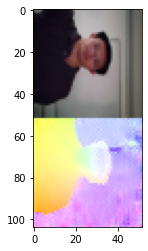

In [6]:
import torch
import numpy as np
from python_libs.optical_flow.raft import RAFT, flow_viz
from python_libs.image import load_image

# for key in flow:
#     print(key)
key = 36
flo = torch.from_numpy(flow[key]).permute(2, 0, 1).unsqueeze(0)
frame_1 = frames.get(key)
image = np.array(load_image(frames.get(key)))
frame = torch.from_numpy(
                np.array(load_image(frames.get(key)).resize((52, 52)))
            ).permute(2, 0, 1).float().unsqueeze(0)
RaftModel.visualize_flow(frame, flo)

    # img = flow_viz.flow_to_image(flo)
    # RaftModel.save_flow(flo, f'{key}.png', "/home/equipo/borrar/")